# 1 Load Libraries and Datasets

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('C:/Users/Hexuan/Downloads/csv files after dealing with missing values (1)/train_after_missing_value.csv')

C:\Users\Hexuan\AppData\Local\Temp\ipykernel_34692\641148885.py:1: DtypeWarning: Columns (260,261,263,264) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('C:/Users/Hexuan/Downloads/csv files after dealing with missing values (1)/train_after_missing_value.csv')


In [3]:
test = pd.read_csv('C:/Users/Hexuan/Downloads/csv files after dealing with missing values (1)/test_after_missing_value.csv')

C:\Users\Hexuan\AppData\Local\Temp\ipykernel_34692\3226831530.py:1: DtypeWarning: Columns (260,261,263,264) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('C:/Users/Hexuan/Downloads/csv files after dealing with missing values (1)/test_after_missing_value.csv')


In [4]:
continuous_features = ['TransactionDT','TransactionAmt' , 'dist1', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3', 'V1', 'V2', 'V3']

# 2 Normalize Train Datasets 

In [5]:
from turtle import shape

train.shape # (# rows, # columns)

(590540, 290)

In [7]:
train[continuous_features].describe()

,TransactionDT,TransactionAmt,dist1,C1,C2,C3,D1,D2,D3,V1,V2,V3
count,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,7.372311e+06,135.027347,52.585090,14.092388,15.269704,0.005644,94.361249,138.388444,19.287537,0.999971,1.023826,1.041150
std,4.617224e+06,239.157438,242.354323,133.566806,154.668031,0.150536,157.491174,132.525633,47.556448,0.005365,0.175789,0.236202
min,8.640000e+04,0.250977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.027058e+06,43.312500,8.000000,1.000000,1.000000,0.000000,0.000000,88.000000,7.000000,1.000000,1.000000,1.000000
50%,7.306528e+06,68.750000,8.000000,1.000000,1.000000,0.000000,3.000000,104.000000,8.000000,1.000000,1.000000,1.000000
75%,1.124662e+07,125.000000,8.000000,3.000000,3.000000,0.000000,121.000000,109.000000,11.000000,1.000000,1.000000,1.000000
max,1.581113e+07,31936.000000,10288.000000,4684.000000,5692.000000,26.000000,640.000000,640.000000,819.000000,1.000000,8.000000,9.000000


array([[<AxesSubplot: title={'center': 'TransactionDT'}>,
        <AxesSubplot: title={'center': 'TransactionAmt'}>,
        <AxesSubplot: title={'center': 'dist1'}>],
       [<AxesSubplot: title={'center': 'C1'}>,
        <AxesSubplot: title={'center': 'C2'}>,
        <AxesSubplot: title={'center': 'C3'}>],
       [<AxesSubplot: title={'center': 'D1'}>,
        <AxesSubplot: title={'center': 'D2'}>,
        <AxesSubplot: title={'center': 'D3'}>],
       [<AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>]], dtype=object)

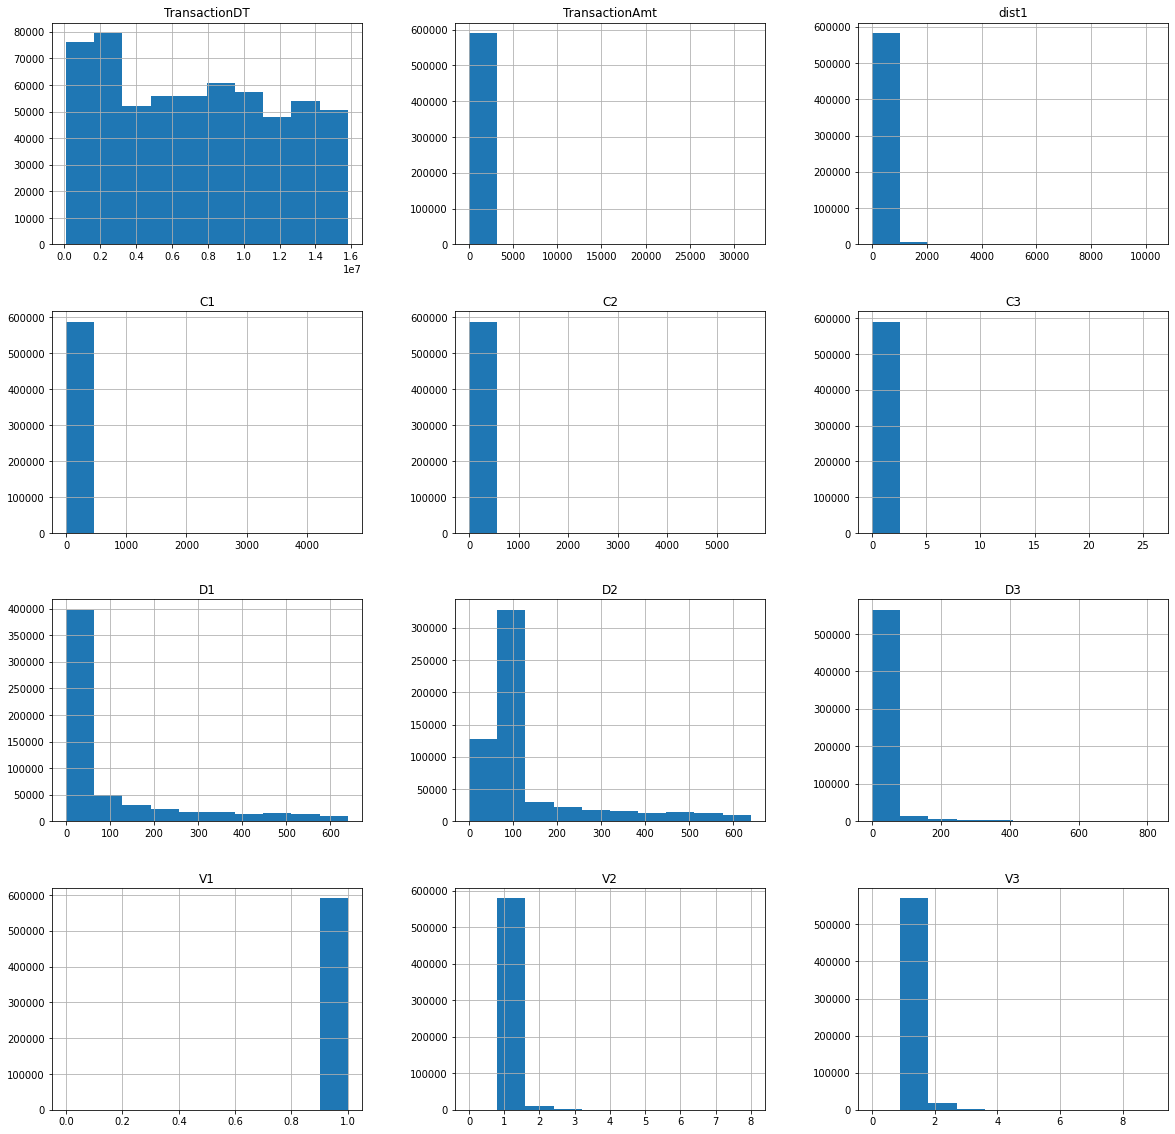

In [16]:
import numpy as np
train_contifeatures = pd.DataFrame((train[continuous_features]), columns=continuous_features)
train_contifeatures.hist(figsize=(20, 20))


## 2.1 Z-score Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
train_data_dropped_z_score_scaled = pd.DataFrame(scaler.fit_transform(train[continuous_features]), columns=continuous_features)
train_data_dropped_z_score_scaled.describe()

,TransactionDT,TransactionAmt,dist1,C1,C2,C3,D1,D2,D3,V1,V2,V3
count,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05
mean,-8.085561e-18,1.460214e-16,-2.755347e-18,1.206818e-17,-7.321524e-18,1.588235e-17,4.493984e-17,2.873863e-17,2.857019e-17,-4.515775e-15,5.888021e-16,-2.411230e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.577987e+00,-5.635471e-01,-2.169763e-01,-1.055083e-01,-9.872575e-02,-3.749273e-02,-5.991531e-01,-1.044240e+00,-4.055718e-01,-1.863777e+02,-5.824167e+00,-4.407885e+00
25%,-9.410974e-01,-3.834918e-01,-1.839667e-01,-9.802136e-02,-9.226028e-02,-3.749273e-02,-5.991531e-01,-3.802169e-01,-2.583782e-01,5.365449e-03,-1.355354e-01,-1.742174e-01
50%,-1.424749e-02,-2.771288e-01,-1.839667e-01,-9.802136e-02,-9.226028e-02,-3.749273e-02,-5.801044e-01,-2.594855e-01,-2.373505e-01,5.365449e-03,-1.355354e-01,-1.742174e-01
75%,8.390999e-01,-4.192784e-02,-1.839667e-01,-8.304756e-02,-7.932935e-02,-3.749273e-02,1.691445e-01,-2.217569e-01,-1.742675e-01,5.365449e-03,-1.355354e-01,-1.742174e-01
max,1.827684e+00,1.329710e+02,4.223330e+01,3.496311e+01,3.670270e+01,1.726792e+02,3.464570e+00,3.785019e+00,1.681608e+01,5.365449e-03,3.968489e+01,3.369512e+01


array([[<AxesSubplot: title={'center': 'TransactionDT'}>,
        <AxesSubplot: title={'center': 'TransactionAmt'}>,
        <AxesSubplot: title={'center': 'dist1'}>],
       [<AxesSubplot: title={'center': 'C1'}>,
        <AxesSubplot: title={'center': 'C2'}>,
        <AxesSubplot: title={'center': 'C3'}>],
       [<AxesSubplot: title={'center': 'D1'}>,
        <AxesSubplot: title={'center': 'D2'}>,
        <AxesSubplot: title={'center': 'D3'}>],
       [<AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>]], dtype=object)

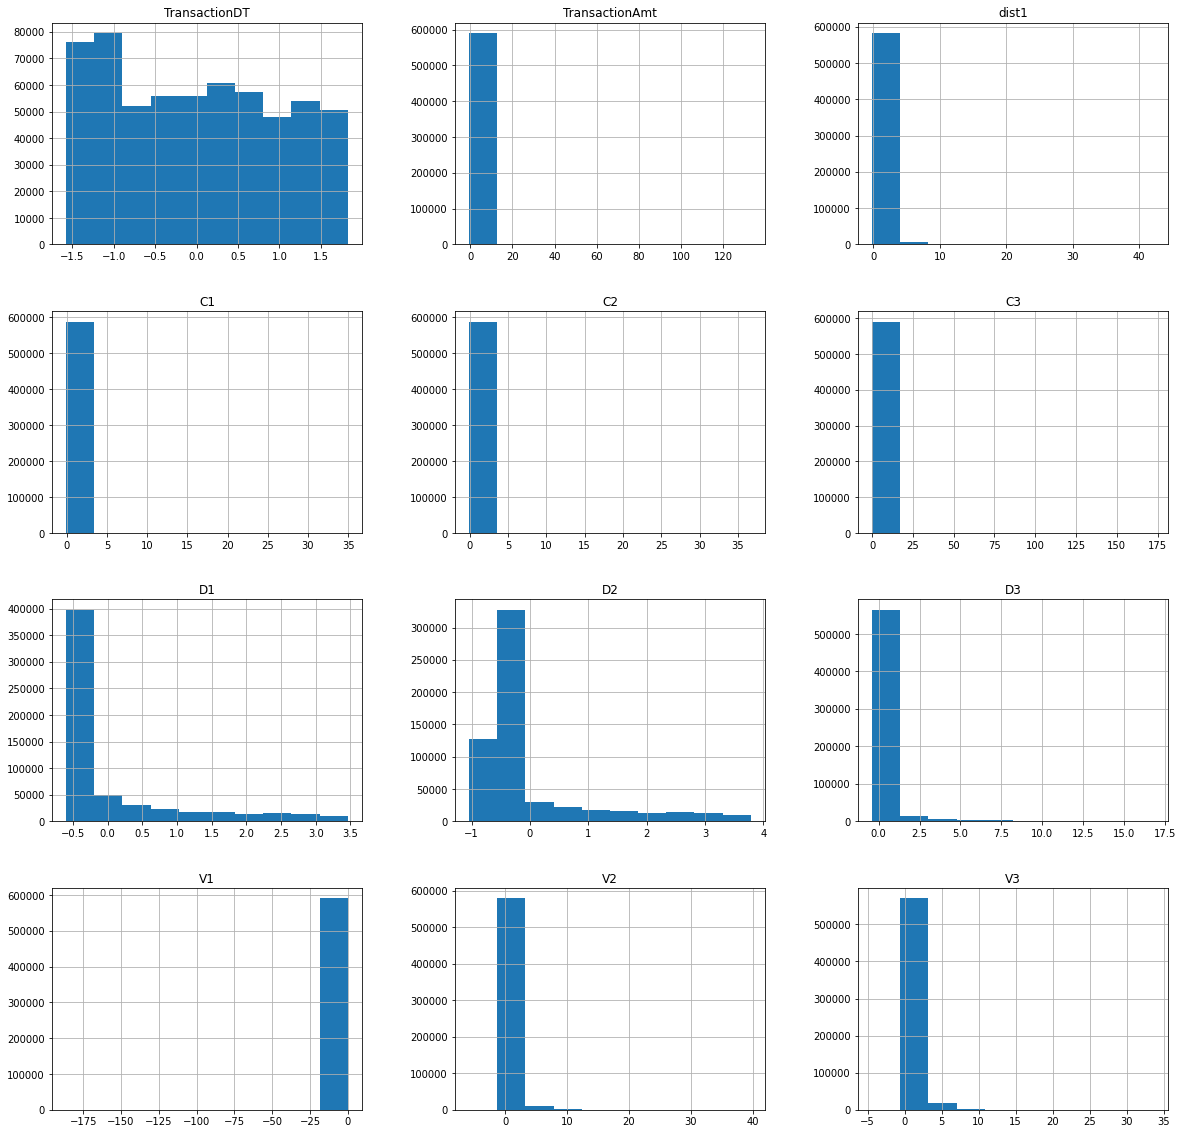

In [11]:
train_data_dropped_z_score_scaled.hist(figsize=(20, 20))

## 2.2 Min-Max Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
min_max = MinMaxScaler()

train_data_imputed_minmax_scaled = pd.DataFrame(min_max.fit_transform(train[continuous_features]), columns = continuous_features)

In [14]:
train_data_imputed_minmax_scaled.describe()

,TransactionDT,TransactionAmt,dist1,C1,C2,C3,D1,D2,D3,V1,V2,V3
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,0.463341,0.004220,0.005111,0.003009,0.002683,0.000217,0.147439,0.216232,0.023550,0.999971,0.127978,0.115683
std,0.293628,0.007489,0.023557,0.028516,0.027173,0.005790,0.246080,0.207071,0.058066,0.005365,0.021974,0.026245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.187008,0.001348,0.000778,0.000213,0.000176,0.000000,0.000000,0.137500,0.008547,1.000000,0.125000,0.111111
50%,0.459157,0.002145,0.000778,0.000213,0.000176,0.000000,0.004688,0.162500,0.009768,1.000000,0.125000,0.111111
75%,0.709724,0.003906,0.000778,0.000640,0.000527,0.000000,0.189063,0.170313,0.013431,1.000000,0.125000,0.111111
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot: title={'center': 'TransactionDT'}>,
        <AxesSubplot: title={'center': 'TransactionAmt'}>,
        <AxesSubplot: title={'center': 'dist1'}>],
       [<AxesSubplot: title={'center': 'C1'}>,
        <AxesSubplot: title={'center': 'C2'}>,
        <AxesSubplot: title={'center': 'C3'}>],
       [<AxesSubplot: title={'center': 'D1'}>,
        <AxesSubplot: title={'center': 'D2'}>,
        <AxesSubplot: title={'center': 'D3'}>],
       [<AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>]], dtype=object)

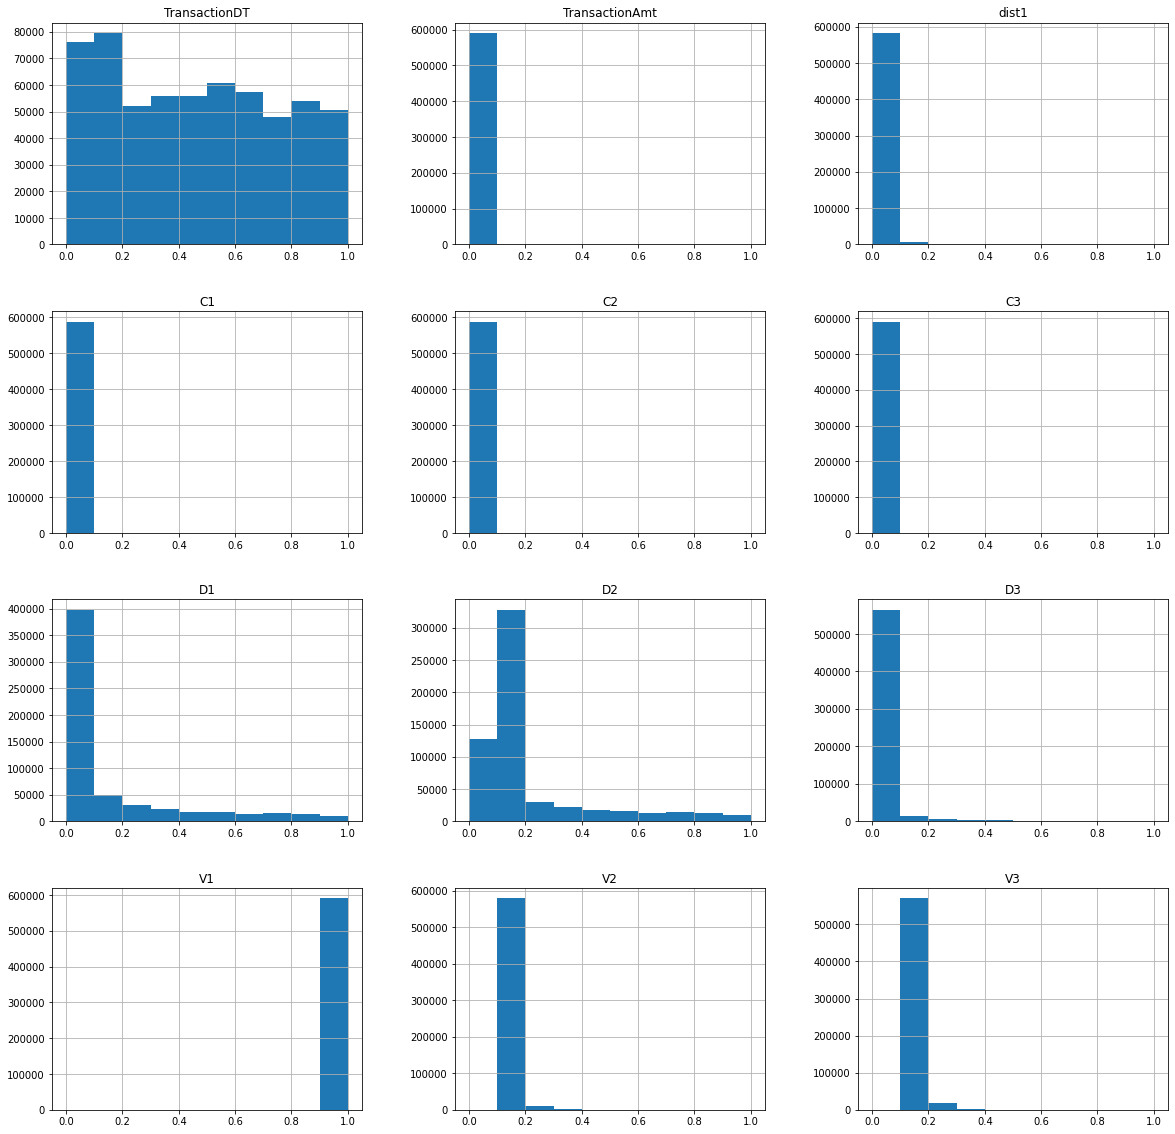

In [23]:
train_data_imputed_minmax_scaled.hist(figsize=(20, 20))

# 3 Normalize Test Datasets

In [6]:
test.shape

(506691, 290)

In [25]:
test[continuous_features].describe()

,TransactionDT,TransactionAmt,dist1,C1,C2,C3,D1,D2,D3,V1,V2,V3
count,5.066910e+05,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000
mean,2.692994e+07,134.725568,41.623076,10.093224,10.714650,0.027403,108.118313,149.437391,23.213501,0.999998,1.030389,1.056976
std,4.756507e+06,245.779822,208.546481,79.334548,88.896658,0.227752,175.910068,150.435501,65.100988,0.001405,0.203708,0.292802
min,1.840322e+07,0.018000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.277154e+07,40.000000,8.000000,1.000000,1.000000,0.000000,0.000000,94.000000,5.000000,1.000000,1.000000,1.000000
50%,2.720466e+07,67.950000,8.000000,1.000000,1.000000,0.000000,6.000000,104.000000,8.000000,1.000000,1.000000,1.000000
75%,3.134856e+07,125.000000,8.000000,3.000000,3.000000,0.000000,145.000000,130.000000,12.000000,1.000000,1.000000,1.000000
max,3.421434e+07,10270.000000,8081.000000,2950.000000,3275.000000,31.000000,641.000000,641.000000,1076.000000,1.000000,11.000000,11.000000


array([[<AxesSubplot: title={'center': 'TransactionDT'}>,
        <AxesSubplot: title={'center': 'TransactionAmt'}>,
        <AxesSubplot: title={'center': 'dist1'}>],
       [<AxesSubplot: title={'center': 'C1'}>,
        <AxesSubplot: title={'center': 'C2'}>,
        <AxesSubplot: title={'center': 'C3'}>],
       [<AxesSubplot: title={'center': 'D1'}>,
        <AxesSubplot: title={'center': 'D2'}>,
        <AxesSubplot: title={'center': 'D3'}>],
       [<AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>]], dtype=object)

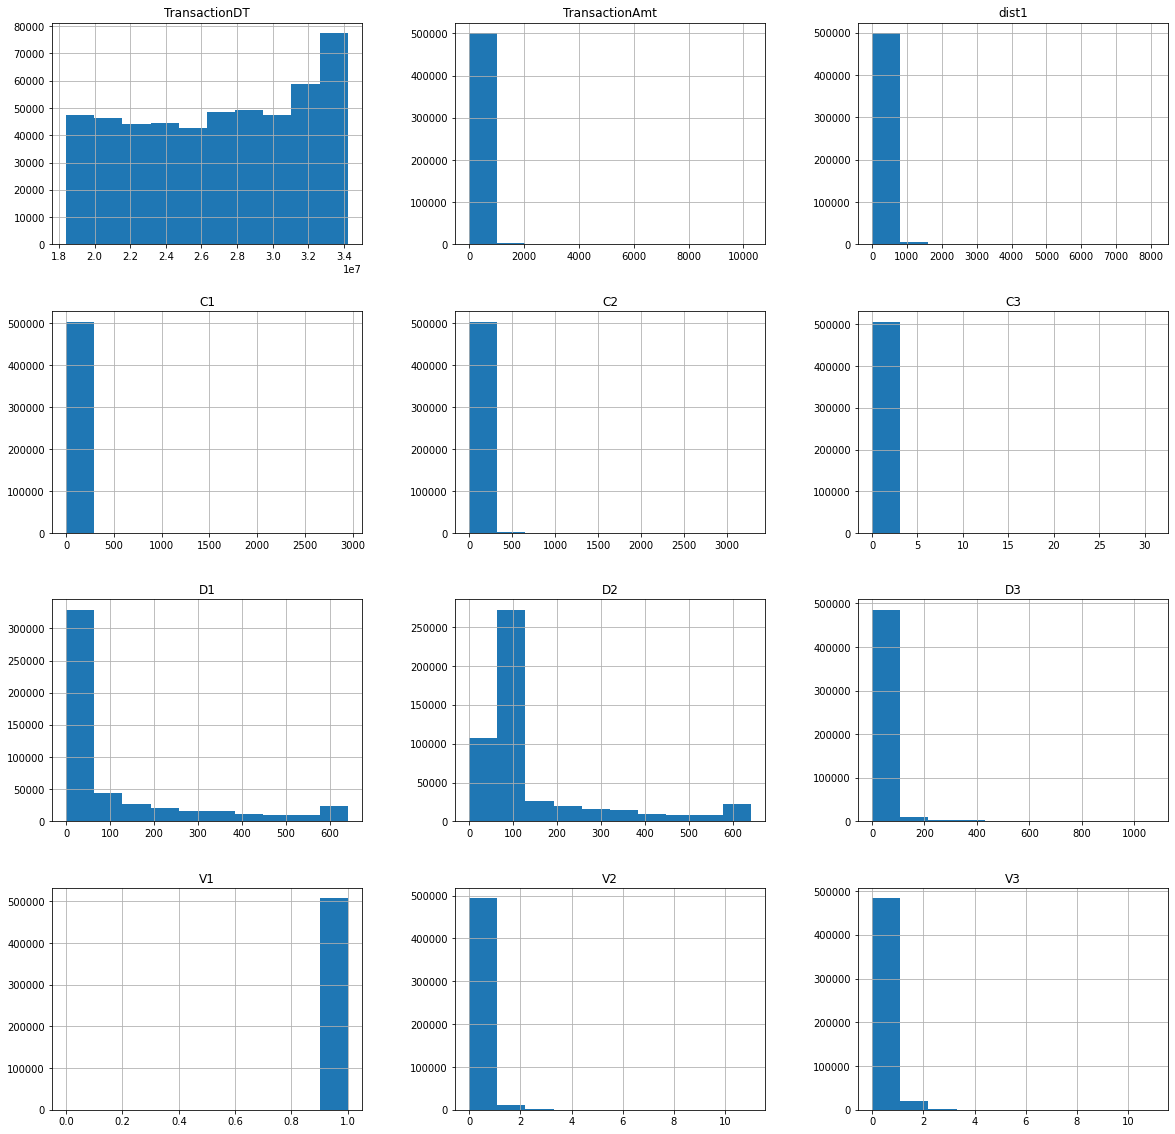

In [17]:
test_contifeatures = pd.DataFrame((test[continuous_features]), columns=continuous_features)
test_contifeatures.hist(figsize=(20, 20))

## 3.1 Z-score Normalization

In [18]:
test_data_dropped_z_score_scaled = pd.DataFrame(scaler.fit_transform(test[continuous_features]), columns=continuous_features)
test_data_dropped_z_score_scaled.describe()

,TransactionDT,TransactionAmt,dist1,C1,C2,C3,D1,D2,D3,V1,V2,V3
count,5.066910e+05,5.066910e+05,5.066910e+05,5.066910e+05,5.066910e+05,5.066910e+05,5.066910e+05,5.066910e+05,5.066910e+05,5.066910e+05,5.066910e+05,5.066910e+05
mean,-8.615852e-17,-8.211984e-17,-1.570598e-18,9.872330e-18,-9.423588e-18,5.160536e-18,-2.367116e-16,-4.420111e-17,2.299804e-18,2.294593e-14,-4.543516e-16,-6.074849e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.792644e+00,-5.480828e-01,-1.995868e-01,-1.272237e-01,-1.205294e-01,-1.203213e-01,-6.146233e-01,-9.933662e-01,-3.565771e-01,-7.118216e+02,-5.058176e+00,-3.609863e+00
25%,-8.742551e-01,-3.854086e-01,-1.612260e-01,-1.146188e-01,-1.092804e-01,-1.203213e-01,-6.146233e-01,-3.685131e-01,-2.797733e-01,1.404846e-03,-1.491811e-01,-1.945872e-01
50%,5.775689e-02,-2.716888e-01,-1.612260e-01,-1.146188e-01,-1.092804e-01,-1.203213e-01,-5.805149e-01,-3.020393e-01,-2.336910e-01,1.404846e-03,-1.491811e-01,-1.945872e-01
75%,9.289650e-01,-3.957029e-02,-1.612260e-01,-8.940911e-02,-8.678231e-02,-1.203213e-01,2.096624e-01,-1.292076e-01,-1.722480e-01,1.404846e-03,-1.491811e-01,-1.945872e-01
max,1.531463e+00,4.123725e+01,3.854961e+01,3.705712e+01,3.672004e+01,1.359928e+02,3.029288e+00,3.267600e+00,1.617161e+01,1.404846e-03,4.894077e+01,3.395817e+01


array([[<AxesSubplot: title={'center': 'TransactionDT'}>,
        <AxesSubplot: title={'center': 'TransactionAmt'}>,
        <AxesSubplot: title={'center': 'dist1'}>],
       [<AxesSubplot: title={'center': 'C1'}>,
        <AxesSubplot: title={'center': 'C2'}>,
        <AxesSubplot: title={'center': 'C3'}>],
       [<AxesSubplot: title={'center': 'D1'}>,
        <AxesSubplot: title={'center': 'D2'}>,
        <AxesSubplot: title={'center': 'D3'}>],
       [<AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>]], dtype=object)

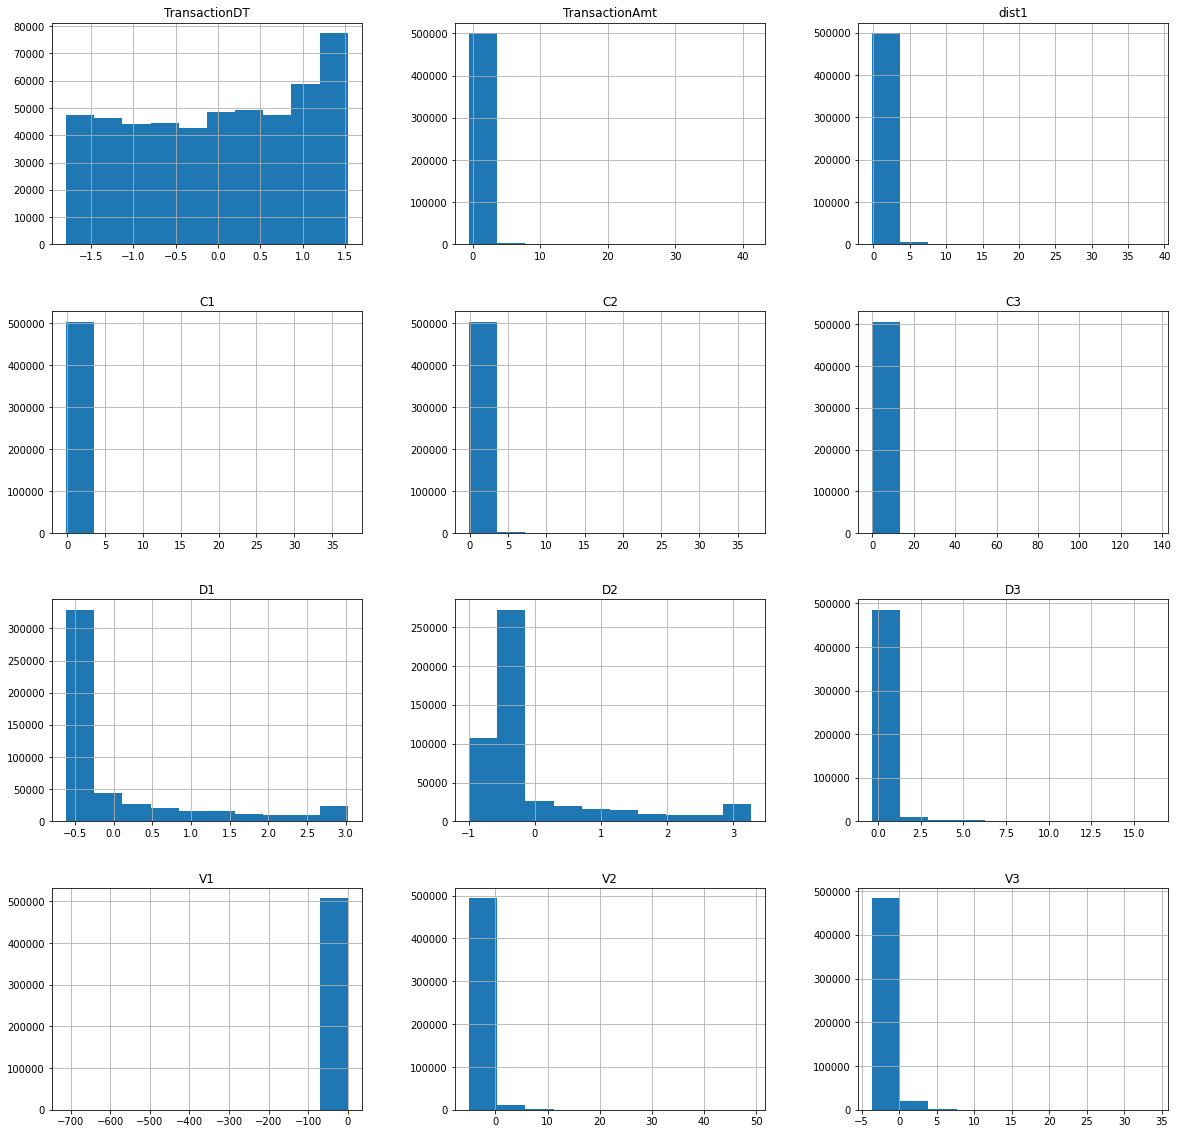

In [19]:
test_data_dropped_z_score_scaled.hist(figsize=(20, 20))

## 3.2 Min-Max Normalization

In [21]:
min_max = MinMaxScaler()

test_data_imputed_minmax_scaled = pd.DataFrame(min_max.fit_transform(test[continuous_features]), columns = continuous_features)

In [22]:
test_data_imputed_minmax_scaled.describe()

,TransactionDT,TransactionAmt,dist1,C1,C2,C3,D1,D2,D3,V1,V2,V3
count,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000
mean,0.539286,0.013117,0.005151,0.003421,0.003272,0.000884,0.168671,0.233132,0.021574,0.999998,0.093672,0.096089
std,0.300833,0.023932,0.025807,0.026893,0.027144,0.007347,0.274431,0.234689,0.060503,0.001405,0.018519,0.026618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.276281,0.003893,0.000990,0.000339,0.000305,0.000000,0.000000,0.146646,0.004647,1.000000,0.090909,0.090909
50%,0.556661,0.006615,0.000990,0.000339,0.000305,0.000000,0.009360,0.162246,0.007435,1.000000,0.090909,0.090909
75%,0.818749,0.012170,0.000990,0.001017,0.000916,0.000000,0.226209,0.202808,0.011152,1.000000,0.090909,0.090909
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot: title={'center': 'TransactionDT'}>,
        <AxesSubplot: title={'center': 'TransactionAmt'}>,
        <AxesSubplot: title={'center': 'dist1'}>],
       [<AxesSubplot: title={'center': 'C1'}>,
        <AxesSubplot: title={'center': 'C2'}>,
        <AxesSubplot: title={'center': 'C3'}>],
       [<AxesSubplot: title={'center': 'D1'}>,
        <AxesSubplot: title={'center': 'D2'}>,
        <AxesSubplot: title={'center': 'D3'}>],
       [<AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>]], dtype=object)

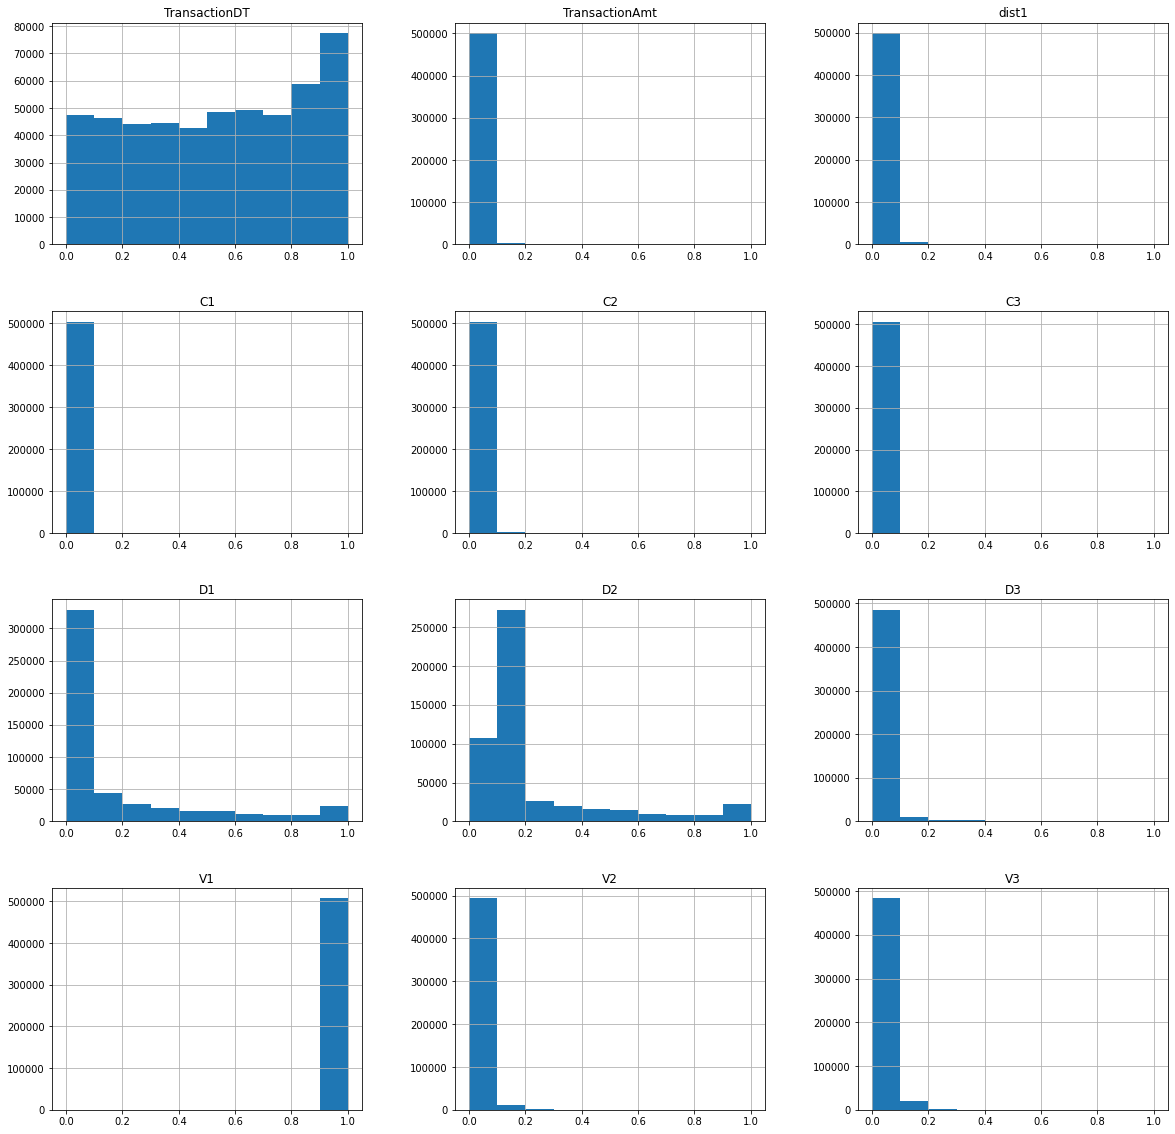

In [24]:
test_data_imputed_minmax_scaled.hist(figsize=(20, 20))